In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
path = 'https://raw.githubusercontent.com/dan1dr/microdosing/main/data/wide.csv'
data = pd.read_csv('./wide.csv', sep=',', index_col=0)
pd.options.display.max_columns = None

In [3]:
data.head()

,ResponseId,StartDate,EndDate,RecordedDate,Angry,Distressed,Afraid,Frustrated,Nervous,Alarmed,Tense,Annoyed,Astonished,Excited,Alert,Delighted,Amused,Glad,Happy,Pleased,Sad,Miserable,Depressed,Droopy,Gloomy,Fatigued,Bored,Tired,Serene,Content,Calm,At ease,Satisfied,Relaxed,Sleepy,Quiet,Current,Reddit,Country,Age,Gender,Orientation,Ethnicity,Ethnicity_11_TEXT,Religion,Religion_12_TEXT,Religiosity,Spirituality,Education,SES,AgeMD,Substance_1,Substance_2,Substance_8,Dose_1,Dose_4,Dose_2,Dose_3,Dose_7,Dose_8,Spacing,DoseNumber,Money,Money_1_TEXT,Money_2_TEXT,Money_3_TEXT,Money_5_TEXT,Money_6_TEXT,Friends,Recommend,Pro_1,Pro_1_TEXT,Pro_2,Pro_2_TEXT,Pro_3,Pro_3_TEXT,Con_1,Con_1_TEXT,Con_2,Con_2_TEXT,Con_3,Con_3_TEXT,ImpSleep,ImpEating,ImpExercise,ImpMeditative,ImpMood,ImpAnxiety,RedAlcohol,RedTobacco,RedCaffeine,RedCannabis,RedOther_illicit,RedPsychiatric,OverallHealth,DrugRecreational_1,DrugRecreational_2,DrugRecreational_3,DrugRecreational_4,DrugRecreational_5,DrugRecreational_6,DrugRecreational_7,DrugRecreational_8,DrugRecreational_9,DrugRecreational_10,DrugRecreational_11,DrugRecreational_12,DrugRecreational_13,DrugRecreationalMD,Diagnoses_2,Diagnoses_3,Diagnoses_4,Diagnoses_5,Diagnoses_18,Diagnoses_14,Diagnoses_7,Diagnoses_8,Diagnoses_15,Diagnoses_16,Diagnoses_10,DrugRXCurrent,DrugRXCurrent_1_TEXT,DrugRXMD,DrugRXMD_1_TEXT,BFI.2_63,BFI.2_64,BFI.2_65,BFI.2_66,BFI.2_67,BFI.2_68,BFI.2_69,BFI.2_70,BFI.2_71,BFI.2_72,BFI.2_73,BFI.2_74,BFI.2_75,BFI.2_76,BFI.2_77,BFI.2_78,BFI.2_79,BFI.2_80,BFI.2_81,BFI.2_82,BFI.2_83,BFI.2_84,BFI.2_85,BFI.2_86,BWSS_28,BWSS_29,BWSS_30,BWSS_31,BWSS_32,BWSS_33,BWSS_34,BWSS_35,BWSS_36,BWSS_37,BWSS_38,BWSS_39,BWSS_40,BWSS_41,BWSS_42,BWSS_43,BWSS_44,BWSS_45,BWSS_46,BWSS_47,BWSS_48,DAS.A.17_87,DAS.A.17_88,DAS.A.17_89,DAS.A.17_90,DAS.A.17_91,DAS.A.17_92,DAS.A.17_93,DAS.A.17_94,DAS.A.17_95,DAS.A.17_96,DAS.A.17_97,DAS.A.17_98,DAS.A.17_99,DAS.A.17_100,DAS.A.17_101,DAS.A.17_102,DAS.A.17_103,DebreifWithdraw,Substance_8_TEXT...Topics,Ethnicity_11_TEXT...Topics,Religion_12_TEXT...Topics,Dose_1_TEXT...Topics,Dose_2_TEXT...Topics,Dose_4_TEXT...Topics,Occupation...Topics,DrugRXCurrent_1_TEXT...Topics,Reddit_5_TEXT...Topics,DrugRXMD_1_TEXT...Topics,DrugRecreationalMD_1_TEXT...Topics,Con_1_TEXT...Topics,Con_2_TEXT...Topics,Con_3_TEXT...Topics,MD,LogDoseNumber,TB,TBt,Con_1_TEXT...TopicsXT,Pro,Con,Diagnosis,FD,Polydrug,Mood.Valence,Mood.Intensity,NegEmo,NegEmo_Anx,NegEmo_Dep,NegEmo_EVo,OpenMind,OpenMind_Aes,OpenMind_Int,OpenMind_CrI,BWSS,DAS,DAS_Pft,DAS_Dep,Con_1_Code,Con_2_Code,Con_3_Code,ProIndex,ProCode,ResponseId.1,Rating.P,ProRating,ResponseId.2,ConIndex,ConCode,Rating.C,ConRating,ProConcept,ProCategory,ConConcept,ConCategory,ProCode1,ProCategory1,ProRating1,ConCode1,ConCategory1,ConRating1,ProCode2,ProCategory2,ProRating2,ConCode2,ConCategory2,ConRating2,ProCode3,ProCategory3,ProRating3,ConCode3,ConCategory3,ConRating3
0,R_0HSeYpblz5LCLpD,19/09/2017 18:27,19/09/2017 18:51,19/09/2017 18:51,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,5,187,21,-1.0,-1.0,1,-99,1,-99,2,20,6.0,1.0,20,1,-99,-99,-99,1,-99,-99,-99,-99,3,25.0,1,5,-99,-99,-99,-99,0,2,85,Self-Reflection,90.0,Changing internal beliefs,55.0,Habit-Training,25.0,Worse night of sleep,4.0,Illegal,20.0,"I'm on a ""drug""",0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,83.0,2.0,4.0,2.0,1.0,1.0,4.0,4.0,3.0,4.0,4.0,1.0,1.0,4.0,NaN,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,4.0,-99,NaN,NaN,50.0,29.0,43.0,100.0,14.0,91.0,100.0,72.0,61.0,100.0,28.0,73.0,90.0,35.0,76.0,97.0,47.0,91.0,80.0,30.0,72.0,96.0,0.0,93.0,94.0,41.0,66.0,44.0,90.0,77.0,60.0,71.0,84.0,26.0,38.0,81.0,33.0,43.0,61.0,37.0,100.0,17.0,8.0,19.0,95.0,18.0,85.0,58.0,89.0,88.0,57.0,59.0,57.0,59.0,85.0,82.0,35.0,80.0,50.0,72.0,56.0,82.0,1.0,NaN,NaN,NaN,NaN,NaN,12.0,Student,NaN,/r/RationalPsychonaut,NaN,NaN,Sleep Disturbances,Illegality,Stigma,1,3.218876,1,1,NaN,76.666667,16.333333,0.0,1.0,21.0,-9,3,55.083333,80.00,63.00,22.25,75.583333,41.50,98.25,87.0,56.428571,83.72,55.22

In [4]:
print(f"The number of participants were: {data['ResponseId'].nunique()}")

The number of participants were: 278


**Mood board.**
The scale consists of a number of words that describe different feelings and emotions. 

*Please select each item that describes how you have felt during the past week*

<img src="https://github.com/dan1dr/microdosing/blob/main/images/mood_board.png?raw=True" width="400" height="240">

In [5]:
data.loc[:,'Angry':'Quiet'].sum().sort_values(ascending=False)

Happy         161
Content       156
Calm          144
Amused        139
Tired         129
Relaxed       128
Alert         126
Pleased       126
Sleepy        125
Excited       124
Annoyed       113
Nervous       111
At ease       111
Frustrated    109
Satisfied     107
Glad          107
Fatigued      103
Quiet          99
Bored          97
Tense          93
Delighted      89
Serene         67
Sad            61
Depressed      55
Gloomy         45
Angry          42
Distressed     35
Afraid         31
Astonished     30
Droopy         24
Miserable      23
Alarmed        22
dtype: int64

*Do you currently microdose or will your response be based on past experience?*

In [6]:
data['Current'].value_counts()

1    150
2    128
Name: Current, dtype: int64

In [7]:
print(f"Currently microdosing: {sum(data['Current']==1)}")
print(f"Not currently, but in the past: {sum(data['Current']==2)}")

Currently microdosing: 150
Not currently, but in the past: 128


## Demographics

**In which country do you live?**

In [8]:
dict_countries = {187: "USA", 31: "CAN", 128: "NOR",
        9: "AUS", 65: "DEU", 168: "SWE", 
        122: "NLD", 185: "GBR", 60: "FIN",
        -1: "Not answered", 169: "CHE", 10: "AUT",
        61: "FRA", 82: "IRL", 163: "ESP", 179: "TUR",
        48: "DNK", 137: "POL", 84: "ITA", 123: "NZL",
        186: "TZA" , 111: "MEX", 17: "BEL",
        143: "RUS", 183: "UKR", 7: "ARG",
        1: "Prefer not to answer", 94: "LVA" }

In [9]:
data.replace({"Country": dict_countries}, inplace=True)
data['Country'].value_counts()

USA                     142
CAN                      31
NOR                      17
AUS                      13
DEU                      10
SWE                       8
NLD                       7
GBR                       6
FIN                       6
CHE                       5
Not answered              5
AUT                       3
IRL                       3
FRA                       3
DNK                       2
POL                       2
ESP                       2
ITA                       2
TUR                       2
LVA                       1
TZA                       1
Prefer not to answer      1
MEX                       1
NZL                       1
BEL                       1
UKR                       1
ARG                       1
RUS                       1
Name: Country, dtype: int64

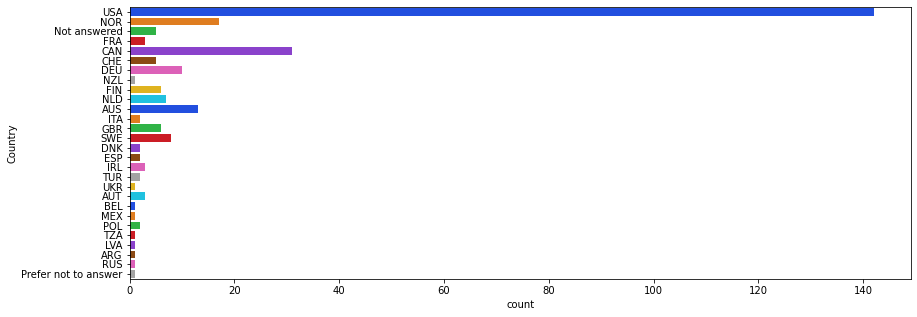

In [10]:
plt.figure(figsize=(14,5))
sns.countplot(data=data, y='Country', orient='h', palette='bright')

In [11]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [12]:
import plotly
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [13]:
plotly.__version__
# requires version >= 1.9.0

'4.14.3'

In [55]:
countries = data['Country'].value_counts().to_frame()
edit_countries = countries.drop(['Not answered', 'Prefer not to answer', 'USA'], axis=0)
edit_countries

,Country
CAN,31
NOR,17
AUS,13
DEU,10
SWE,8
NLD,7
GBR,6
FIN,6
CHE,5
AUT,3


In [56]:
data_countries = dict(type = 'choropleth',
                      colorscale='Plasma',
                      reversescale=True, 
                      locations = edit_countries.index,
                      locationmode = 'ISO-3',
                      z = edit_countries['Country'],
                      text = edit_countries['Country'],
                      colorbar = {'title': 'Demography of survey'}
                     )

layout = dict(title = 'Demography of survey',
             geo = dict(showframe = False,
                        projection = {'type': 'natural earth'} ))

In [58]:
chromap = go.Figure(data = [data_countries],
                    layout = layout)
plot(chromap, validate=False)

'temp-plot.html'

This is what we obtain, the plot it is not showed when uploading the notebook due to the library, you can choose to plot it here with ``iplot()`` or open a new window with ``plot()``

<img src="https://github.com/dan1dr/microdosing/blob/main/images/map1.png?raw=True" width="700" height="400">

**What is your age in years?**

(array([  7.,   0.,   0.,   0.,   0.,   0.,   0., 194.,  65.,  12.]),
 array([-99. , -82.8, -66.6, -50.4, -34.2, -18. ,  -1.8,  14.4,  30.6,
         46.8,  63. ]),
 <a list of 10 Patch objects>)

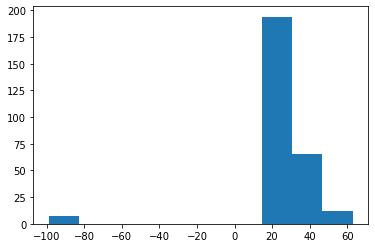

In [108]:
plt.hist(data['Age'])

Let's clean that negative ages (may be people which birth is to happen :D)

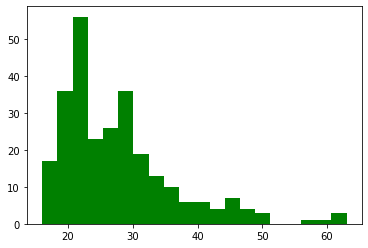

In [249]:
data = data.drop(data.loc[data['Age'] < 0].index)
plt.hist(data['Age'], bins=20, color='green');

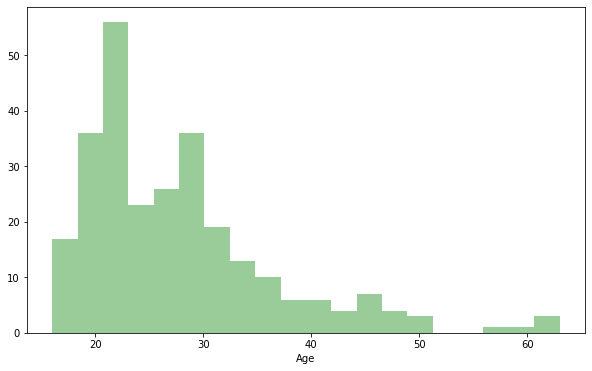

In [250]:
plt.figure(figsize=(10,6))
sns.distplot(data['Age'], bins=20, kde=False,
             color='green', axlabel='Age');

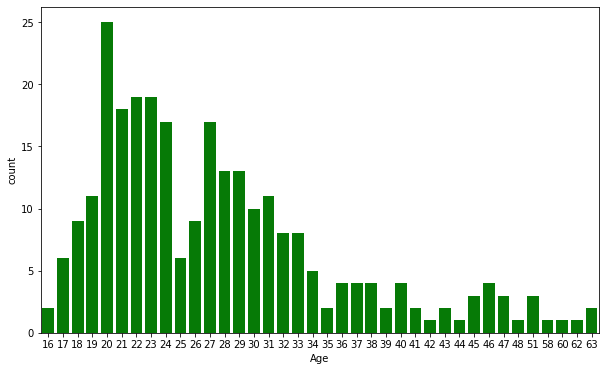

In [169]:
plt.figure(figsize=(10,6))
sns.countplot(data['Age'], color='green', saturation=0.9)

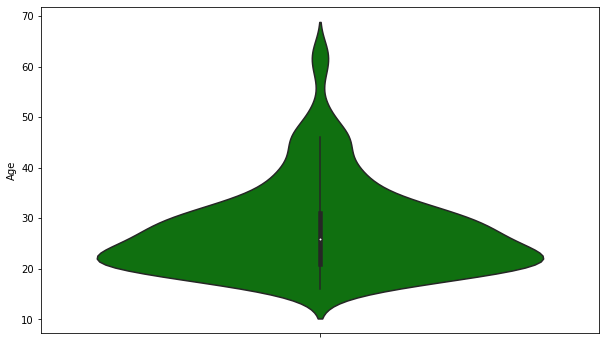

In [171]:
plt.figure(figsize=(10,6))
sns.violinplot(data['Age'], orient='v', color='green')

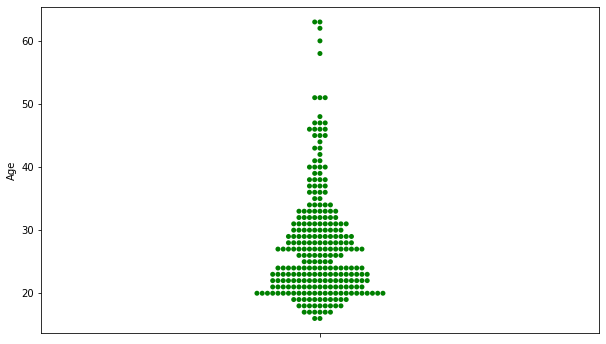

In [172]:
plt.figure(figsize=(10,6))
sns.swarmplot(data['Age'], orient='v', color='green')

**What is your gender?**

In [179]:
dict = {-1: 'Male', 1: 'Female'}
data.replace({"Gender": dict}, inplace=True)
data['Gender'].value_counts()

Male      237
Female     31
Name: Gender, dtype: int64

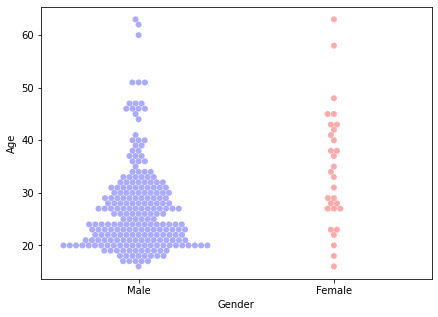

In [260]:
plt.figure(figsize=(7,5))
sns.swarmplot(x='Gender', y='Age', data=data, palette='bwr',
             order=['Male', 'Female'], size=6)

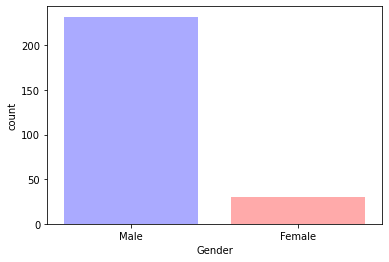

In [261]:
sns.countplot(x='Gender', data=data, palette='bwr',
              saturation=1)

In [272]:
data['Orientation'].value_counts()

Heterosexual    215
Homosexual       51
Name: Orientation, dtype: int64

**What is your sexual orientation?**

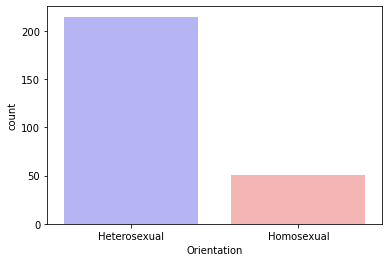

In [273]:
dict = {-1: 'Heterosexual', 1: 'Homosexual'}
data.replace({"Orientation": dict}, inplace=True)
sns.countplot(x='Orientation', data=data, palette='bwr')

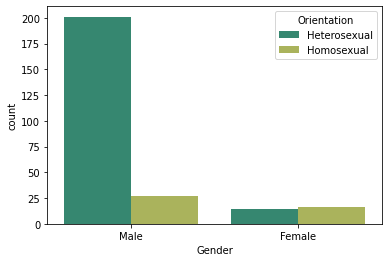

In [278]:
sns.countplot(x='Gender', data=data, hue='Orientation',
              palette='gist_earth', saturation=1)

As a curiosity, the number of homosexual people among females was much higher than in males

**What is your ethnic heritage?**

In [312]:
dict = {1: 'White', 8: 'European', 10: 'Mixed',
        13: 'Hispanic or Latino', 11: 'Other', 
        6: 'Middle Eastern', 4: 'East Asian',
        12: 'Prefer not to answer', 5: 'South Asian',
        2: 'Black' }
data.replace({'Ethnicity':dict}, inplace=True)

In [313]:
data['Ethnicity'].count()

271

In [317]:
data['Ethnicity'].value_counts()

White                   204
European                 24
Mixed                    14
Hispanic or Latino        9
Other                     6
Middle Eastern            6
East Asian                4
Prefer not to answer      2
Black                     1
South Asian               1
Name: Ethnicity, dtype: int64

In [321]:
data['Ethnicity'].value_counts()/data['Ethnicity'].count()*100
#Percentages

White                   75.276753
European                 8.856089
Mixed                    5.166052
Hispanic or Latino       3.321033
Other                    2.214022
Middle Eastern           2.214022
East Asian               1.476015
Prefer not to answer     0.738007
Black                    0.369004
South Asian              0.369004
Name: Ethnicity, dtype: float64

**What, if any, is your religious affilitation?**

In [326]:
dict = {1: 'Non-religious', 14: 'Spiritual but non-religious',
        2: 'Judaism', 7: 'Hinduism', 8: 'Buddhism', 9: 'Sihkism',
        3: 'Christianity', 4: 'Islam', 12: 'Other',
        13: 'Prefer not to answer'}
data.replace({'Religion': dict}, inplace=True)
data['Religion'].value_counts()

Non-religious                  157
Spiritual but non-religious     79
Other                           12
Christianity                     9
Buddhism                         8
Judaism                          4
Prefer not to answer             1
Hinduism                         1
Name: Religion, dtype: int64

In [339]:
a = data['Religion'].value_counts() / data['Religion'].count() *100
a

Non-religious                  57.933579
Spiritual but non-religious    29.151292
Other                           4.428044
Christianity                    3.321033
Buddhism                        2.952030
Judaism                         1.476015
Prefer not to answer            0.369004
Hinduism                        0.369004
Name: Religion, dtype: float64

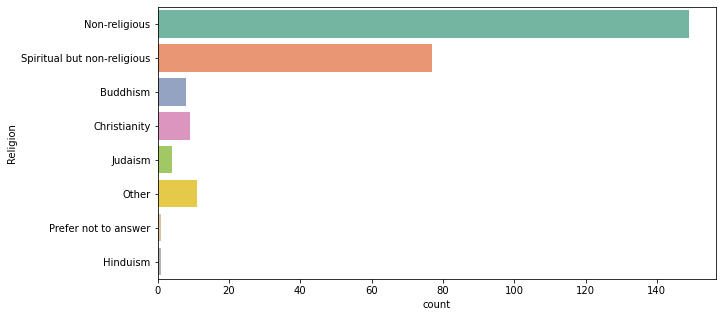

In [373]:
plt.figure(figsize=(10,5))
sns.countplot(y='Religion', data=data, orient='h', palette='Set2')

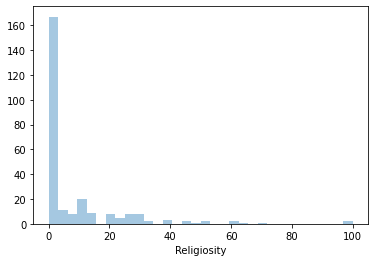

In [381]:
data = data.drop(data.loc[data['Religiosity'] < 0].index)
sns.distplot(data['Religiosity'], kde=False)

**Please use the bar to indicate how religious and spiritual consider yourself (from 0 to 100)?**

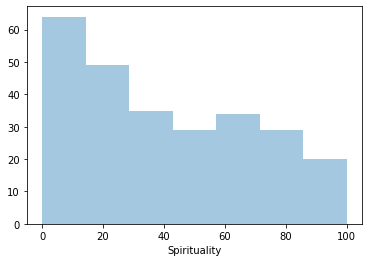

In [372]:
data = data.drop(data.loc[data['Spirituality'] < 0].index)
sns.distplot(data['Spirituality'], kde=False)

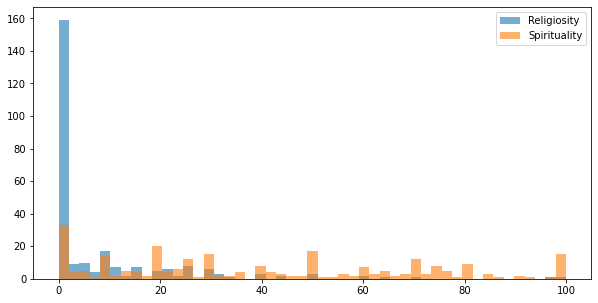

In [393]:
import numpy as np
plt.figure(figsize=(10,5))
x = data['Religiosity']
y = data['Spirituality']

bins = np.linspace(0, 100)

plt.hist(x, bins, alpha=0.6, label='Religiosity')
plt.hist(y, bins, alpha=0.6, label='Spirituality')
plt.legend(loc='upper right')
plt.show()

**What is your occupation? Please be general (e.g. "student", "software developer")**

Consult the [International Standard
Classifi cation of Occupations](https://www.ilo.org/wcmsp5/groups/public/---dgreports/---dcomm/---publ/documents/publication/wcms_172572.pdf) to see correspondences

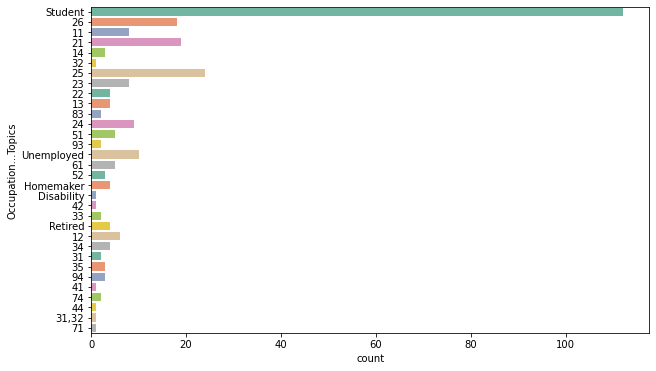

In [240]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, y=data['Occupation...Topics'], palette='Set2')

**What is your highest completed formal education?**

In [398]:
dict = {1: 'Doctoral', 2: 'Master', 3: 'Bachelor',
        4: 'Short-cycle tertiary education',
        5: 'Post-secondary non-tertiary education',
        6: 'Upper secondary education', 7 : 'Lower secondary education',
        9: 'Primary education', 10: 'Early childhood education', 
        8: 'Prefer not to answer'}
data.replace({'Education':dict}, inplace=True)
data['Education'].value_counts()

Upper secondary education                96
Short-cycle tertiary education           44
Bachelor                                 40
Lower secondary education                27
Post-secondary non-tertiary education    23
Doctoral                                 12
Prefer not to answer                      7
Master                                    5
0.0                                       2
Name: Education, dtype: int64

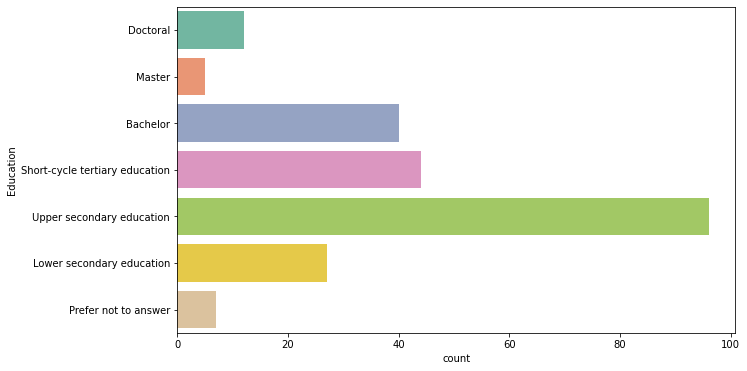

In [406]:
plt.figure(figsize=(10,6))
order = ['Doctoral', 'Master', 'Bachelor', 'Short-cycle tertiary education',
         'Upper secondary education', 'Lower secondary education', 'Prefer not to answer']
sns.countplot(y='Education', data=data, orient='h', palette='Set2', order=order)

**What is the social class of your household?**

In [411]:
dict = {3: 'Upper class', 2: 'Upper-middle class', 1: 'Middle class',
        0: 'Lower-middle class', -1: 'Skilled working class', -2: 'Working class',
        -3: 'Non-working class', 99: 'Prefer not to answer'}

data.replace({'SES': dict}, inplace=True)
data['SES'].value_counts()

Middle class             121
Upper-middle class        51
Lower-middle class        37
Skilled working class     17
Non-working class         16
Working class             15
Name: SES, dtype: int64

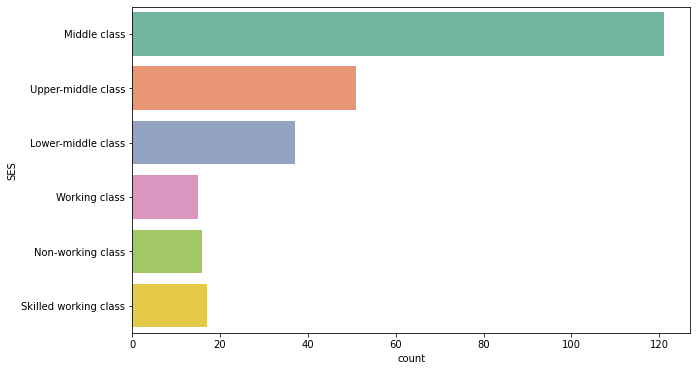

In [413]:
plt.figure(figsize=(10,6))
#order = ['Doctoral', 'Master', 'Bachelor', 'Short-cycle tertiary education',
sns.countplot(y='SES', data=data, orient='h', palette='Set2')

## Microdosing

**At what age did your first begin microdosing?**

In [5]:
data.head()

,ResponseId,StartDate,EndDate,RecordedDate,Angry,Distressed,Afraid,Frustrated,Nervous,Alarmed,Tense,Annoyed,Astonished,Excited,Alert,Delighted,Amused,Glad,Happy,Pleased,Sad,Miserable,Depressed,Droopy,Gloomy,Fatigued,Bored,Tired,Serene,Content,Calm,At ease,Satisfied,Relaxed,Sleepy,Quiet,Current,Reddit,Country,Age,Gender,Orientation,Ethnicity,Ethnicity_11_TEXT,Religion,Religion_12_TEXT,Religiosity,Spirituality,Education,SES,AgeMD,Substance_1,Substance_2,Substance_8,Dose_1,Dose_4,Dose_2,Dose_3,Dose_7,Dose_8,Spacing,DoseNumber,Money,Money_1_TEXT,Money_2_TEXT,Money_3_TEXT,Money_5_TEXT,Money_6_TEXT,Friends,Recommend,Pro_1,Pro_1_TEXT,Pro_2,Pro_2_TEXT,Pro_3,Pro_3_TEXT,Con_1,Con_1_TEXT,Con_2,Con_2_TEXT,Con_3,Con_3_TEXT,ImpSleep,ImpEating,ImpExercise,ImpMeditative,ImpMood,ImpAnxiety,RedAlcohol,RedTobacco,RedCaffeine,RedCannabis,RedOther_illicit,RedPsychiatric,OverallHealth,DrugRecreational_1,DrugRecreational_2,DrugRecreational_3,DrugRecreational_4,DrugRecreational_5,DrugRecreational_6,DrugRecreational_7,DrugRecreational_8,DrugRecreational_9,DrugRecreational_10,DrugRecreational_11,DrugRecreational_12,DrugRecreational_13,DrugRecreationalMD,Diagnoses_2,Diagnoses_3,Diagnoses_4,Diagnoses_5,Diagnoses_18,Diagnoses_14,Diagnoses_7,Diagnoses_8,Diagnoses_15,Diagnoses_16,Diagnoses_10,DrugRXCurrent,DrugRXCurrent_1_TEXT,DrugRXMD,DrugRXMD_1_TEXT,BFI.2_63,BFI.2_64,BFI.2_65,BFI.2_66,BFI.2_67,BFI.2_68,BFI.2_69,BFI.2_70,BFI.2_71,BFI.2_72,BFI.2_73,BFI.2_74,BFI.2_75,BFI.2_76,BFI.2_77,BFI.2_78,BFI.2_79,BFI.2_80,BFI.2_81,BFI.2_82,BFI.2_83,BFI.2_84,BFI.2_85,BFI.2_86,BWSS_28,BWSS_29,BWSS_30,BWSS_31,BWSS_32,BWSS_33,BWSS_34,BWSS_35,BWSS_36,BWSS_37,BWSS_38,BWSS_39,BWSS_40,BWSS_41,BWSS_42,BWSS_43,BWSS_44,BWSS_45,BWSS_46,BWSS_47,BWSS_48,DAS.A.17_87,DAS.A.17_88,DAS.A.17_89,DAS.A.17_90,DAS.A.17_91,DAS.A.17_92,DAS.A.17_93,DAS.A.17_94,DAS.A.17_95,DAS.A.17_96,DAS.A.17_97,DAS.A.17_98,DAS.A.17_99,DAS.A.17_100,DAS.A.17_101,DAS.A.17_102,DAS.A.17_103,DebreifWithdraw,Substance_8_TEXT...Topics,Ethnicity_11_TEXT...Topics,Religion_12_TEXT...Topics,Dose_1_TEXT...Topics,Dose_2_TEXT...Topics,Dose_4_TEXT...Topics,Occupation...Topics,DrugRXCurrent_1_TEXT...Topics,Reddit_5_TEXT...Topics,DrugRXMD_1_TEXT...Topics,DrugRecreationalMD_1_TEXT...Topics,Con_1_TEXT...Topics,Con_2_TEXT...Topics,Con_3_TEXT...Topics,MD,LogDoseNumber,TB,TBt,Con_1_TEXT...TopicsXT,Pro,Con,Diagnosis,FD,Polydrug,Mood.Valence,Mood.Intensity,NegEmo,NegEmo_Anx,NegEmo_Dep,NegEmo_EVo,OpenMind,OpenMind_Aes,OpenMind_Int,OpenMind_CrI,BWSS,DAS,DAS_Pft,DAS_Dep,Con_1_Code,Con_2_Code,Con_3_Code,ProIndex,ProCode,ResponseId.1,Rating.P,ProRating,ResponseId.2,ConIndex,ConCode,Rating.C,ConRating,ProConcept,ProCategory,ConConcept,ConCategory,ProCode1,ProCategory1,ProRating1,ConCode1,ConCategory1,ConRating1,ProCode2,ProCategory2,ProRating2,ConCode2,ConCategory2,ConRating2,ProCode3,ProCategory3,ProRating3,ConCode3,ConCategory3,ConRating3
0,R_0HSeYpblz5LCLpD,19/09/2017 18:27,19/09/2017 18:51,19/09/2017 18:51,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,5,187,21,-1.0,-1.0,1,-99,1,-99,2,20,6.0,1.0,20,1,-99,-99,-99,1,-99,-99,-99,-99,3,25.0,1,5,-99,-99,-99,-99,0,2,85,Self-Reflection,90.0,Changing internal beliefs,55.0,Habit-Training,25.0,Worse night of sleep,4.0,Illegal,20.0,"I'm on a ""drug""",0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,83.0,2.0,4.0,2.0,1.0,1.0,4.0,4.0,3.0,4.0,4.0,1.0,1.0,4.0,NaN,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,4.0,-99,NaN,NaN,50.0,29.0,43.0,100.0,14.0,91.0,100.0,72.0,61.0,100.0,28.0,73.0,90.0,35.0,76.0,97.0,47.0,91.0,80.0,30.0,72.0,96.0,0.0,93.0,94.0,41.0,66.0,44.0,90.0,77.0,60.0,71.0,84.0,26.0,38.0,81.0,33.0,43.0,61.0,37.0,100.0,17.0,8.0,19.0,95.0,18.0,85.0,58.0,89.0,88.0,57.0,59.0,57.0,59.0,85.0,82.0,35.0,80.0,50.0,72.0,56.0,82.0,1.0,NaN,NaN,NaN,NaN,NaN,12.0,Student,NaN,/r/RationalPsychonaut,NaN,NaN,Sleep Disturbances,Illegality,Stigma,1,3.218876,1,1,NaN,76.666667,16.333333,0.0,1.0,21.0,-9,3,55.083333,80.00,63.00,22.25,75.583333,41.50,98.25,87.0,56.428571,83.72,55.22

In [8]:
!pip install --upgrade seaborn

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [3]:
# (Now restart the kernel)
import seaborn as sns
sns.__version__

'0.11.1'

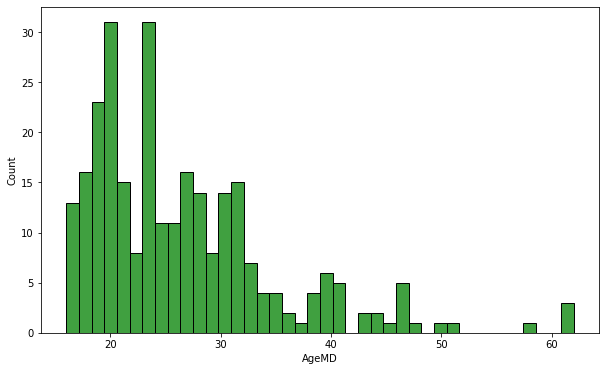

In [27]:
data = data.drop(data.loc[data['AgeMD'] < 0].index)

plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['AgeMD'], bins=40, color='Green')

**What substance do you use for microdosing?**

In [40]:
print(f"LDS: {sum(data['Substance_1']==1)}")
print(f"Psilocybin: {sum(data['Substance_2']==1)}")
print(f"Other: {sum(data['Substance_8']==1)}")

LDS: 226
Psilocybin: 83
Other: 0


**If you have a way of estimating your dose please report it here**

In [91]:
#data.loc[data['Dose_1']==1]['Dose_1_TEXT...Topics']
LSD_micrograms = data.loc[data['Dose_4']==1]['Dose_4_TEXT...Topics']
LSD_percent_per_tab = data.loc[data['Dose_1']==1]['Dose_1_TEXT...Topics'] 
Psilocybin_grams = data.loc[data['Dose_2']==1]['Dose_2_TEXT...Topics']

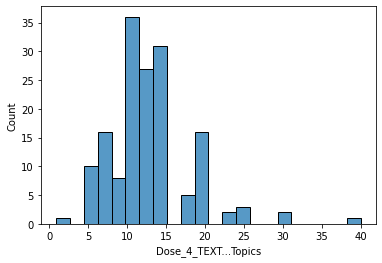

In [86]:
sns.histplot(data=LSD_micrograms, x=data['Dose_4_TEXT...Topics'])

Text(0.5, 0.98, 'LSD dose')

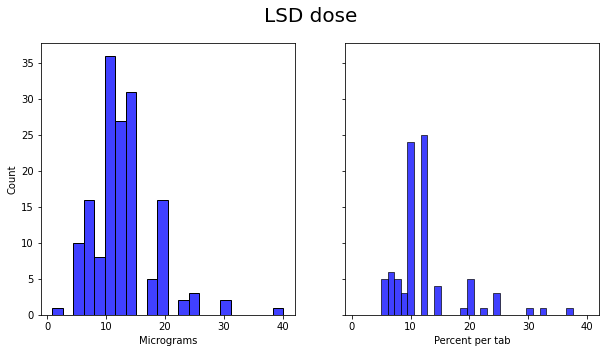

In [166]:
fig, axs = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(10,5))
sns.histplot(data=LSD_micrograms, x=data['Dose_4_TEXT...Topics'], ax=axs[0], color='blue')
axs[0].set(xlabel="Micrograms", ylabel = "Count")

sns.histplot(data=LSD_percent_per_tab, x=data['Dose_1_TEXT...Topics'], ax=axs[1], color='blue')
axs[1].set(xlabel="Percent per tab")
plt.suptitle('LSD dose',fontsize=20)

#assuming a tab of 100 micrograms we could mix them

Text(0.5, 1.0, 'Psilocybin dose')

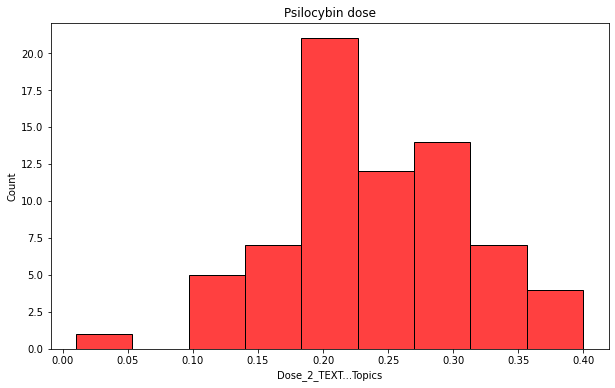

In [168]:
plt.figure(figsize=(10,6))
sns.histplot(data=Psilocybin_grams, x=data['Dose_2_TEXT...Topics'], color='Red').set_title('Psilocybin dose')

In [176]:
print(f"Responded LSD (% per tab): {(data['Dose_1']==1).sum()}")
print(f"Responded LSD (micrograms): {(data['Dose_4']==1).sum()}")
print(f"Responded Psilocybin (grams): {(data['Dose_2']==1).sum()}")
print(f"Responded other: {(data['Dose_3']==1).sum()}")
print(f"I estimate does primarily through trial and error, and by experience: {(data['Dose_7']==1).sum()}")
print(f"I do not really estimate a dose (superheroes): {(data['Dose_8']==1).sum()}")

Responded LSD (% per tab): 96
Responded LSD (micrograms): 164
Responded Psilocybin (grams): 77
Responded other: 7
I estimate does primarily through trial and error, and by experience: 36
I do not really estimate a dose (superheroes): 2


**How many days (approximately) do you space between microdoses?**

In [204]:
dict = {0: 'Every single day', 1: 'Every other day', 2: '1 day on, 2 days off',
        3: '1 day on, 3 days off', 4: '1 day on, 4 days off', 5: '1 day on, 5 days off',
        6: '1 day on, 6 days off', 7: 'Once a week',
        10: 'Once every week and a half', 14: 'Once every 2 weeks', 21: 'Once every 3 weeks',
        30: 'Once every month', 60: 'Once 2 months', -1: 'Less than once every 2 months'}

data.replace({'Spacing': dict}, inplace=True)
data['Spacing'].value_counts()

1 day on, 2 days off          110
1 day on, 3 days off           52
Once a week                    29
Every other day                25
Every single day               15
Once every 2 weeks              9
Once every month                8
1 day on, 4 days off            8
Once every week and a half      7
1 day on, 6 days off            4
Once every 3 weeks              3
1 day on, 5 days off            3
Once 2 months                   3
Name: Spacing, dtype: int64

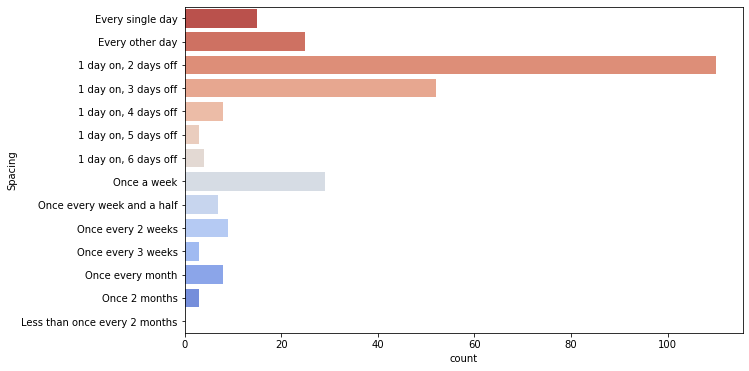

In [205]:
plt.figure(figsize=(10,6))
order = ['Every single day', 'Every other day', '1 day on, 2 days off',
         '1 day on, 3 days off', '1 day on, 4 days off', '1 day on, 5 days off',
         '1 day on, 6 days off', 'Once a week', 
         'Once every week and a half', 'Once every 2 weeks', 'Once every 3 weeks',
         'Once every month', 'Once 2 months', 'Less than once every 2 months']
#order = ['Doctoral', 'Master', 'Bachelor', 'Short-cycle tertiary education',
sns.countplot(data=data, y=data['Spacing'], orient='h', order=order, palette='coolwarm_r')

**Approximately how many microdoses have you taken in your lifetime? (Exclude full-doses)**

Text(0.5, 1.0, 'Microdoses in lifetime')

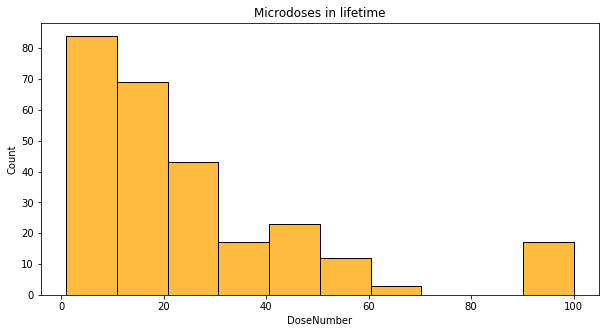

In [222]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='DoseNumber', bins=10, color='orange').set_title('Microdoses in lifetime')

**How much money (approximately) do you spend on microdosing per month?**

In [227]:
data['Money'].value_counts()
#convert eur, cad, gbp and other currency to USD

 1     153
 3      48
 2      33
 6      30
-99      6
 5       6
Name: Money, dtype: int64

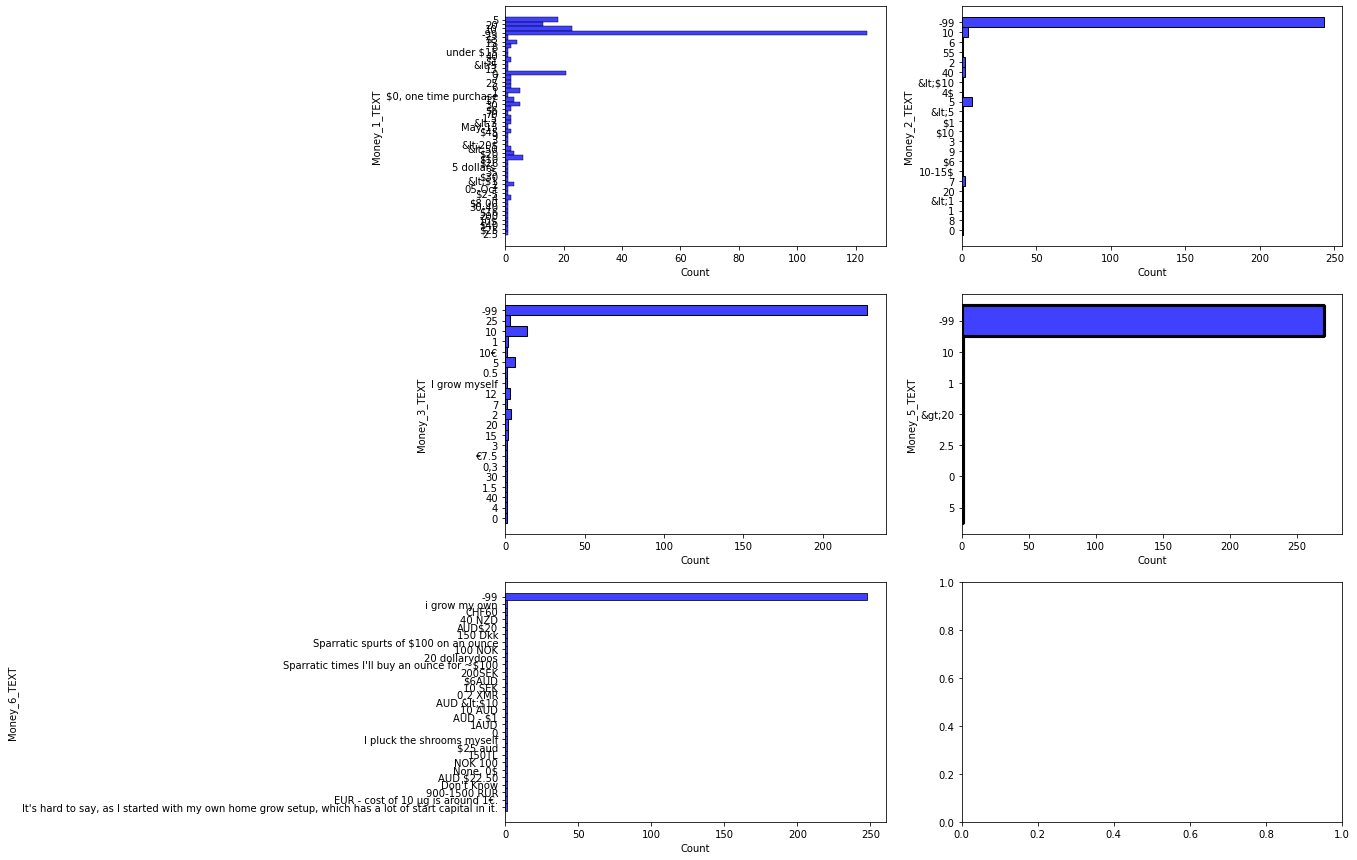

In [262]:
fig, axs = plt.subplots(3,2, figsize=(15,15))

sns.histplot(data=data, y=data['Money_1_TEXT'], ax=axs[0,0], color='blue')

sns.histplot(data=data, y=data['Money_2_TEXT'], ax=axs[0,1], color='blue')

sns.histplot(data=data, y=data['Money_3_TEXT'], ax=axs[1,0], color='blue')

sns.histplot(data=data, y=data['Money_5_TEXT'], ax=axs[1,1], color='blue')

sns.histplot(data=data, y=data['Money_6_TEXT'], ax=axs[2,0], color='blue')

mmm nop, too much noise. We will only take USD

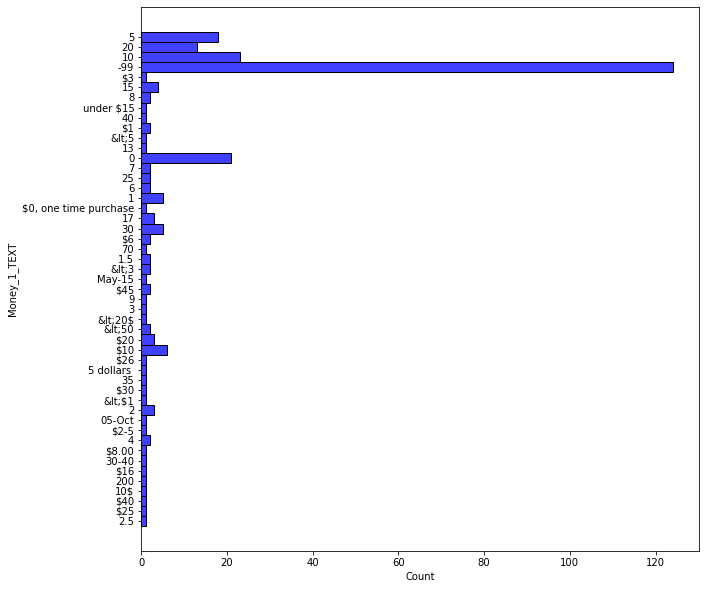

In [264]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, y=data['Money_1_TEXT'] ,color='blue')

We need to clean the answers to be able to obtain more info

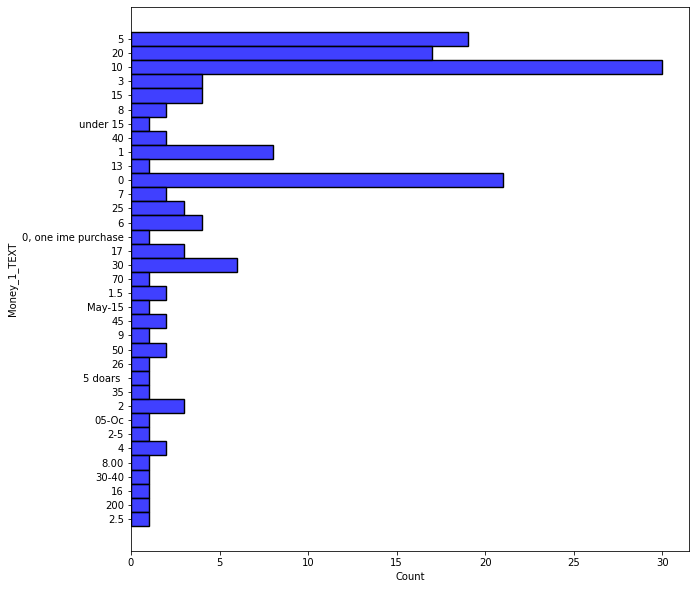

In [300]:
plt.figure(figsize=(10,10))
data['Money_1_TEXT'] = data['Money_1_TEXT'].apply(lambda x: x.translate({ord(i): None for i in '$&lt;'}))
USD_clean = data['Money_1_TEXT'].drop(data.loc[data['Money_1_TEXT'] == '-99'].index)
sns.histplot(data=USD_clean, y=USD_clean ,color='blue')

So it ranges from few dollars to 20-30 $

**How many of your friends, colleagues, and other acquaintances microdose?**

In [305]:
data['Friends'].value_counts()

0     110
1      62
2      45
3      28
4      11
5       8
15      6
6       6
Name: Friends, dtype: int64

**Would you recommend that others try microdosing?**

In [311]:
print(f"Yes, anyone and everyone: {sum(data['Recommend']==1)}")
print(f"Yes, for most people: {sum(data['Recommend']==2)}")
print(f"Maybe, for some people: {sum(data['Recommend']==3)}")
print(f"No, not for most people: {sum(data['Recommend']==4)}")
print(f"No, not for anyone: {sum(data['Recommend']==5)}")

Yes, anyone and everyone: 38
Yes, for most people: 121
Maybe, for some people: 109
No, not for most people: 0
No, not for anyone: 8


In [324]:
print(f"YES: {(sum(data['Recommend']==1)+sum(data['Recommend']==2))/len(data)*100} %")
print(f"MAYBE: {sum(data['Recommend']==3)/len(data)*100} %")
print(f"NO: {(sum(data['Recommend']==4)+sum(data['Recommend']==5))/len(data)*100} %")

YES: 57.608695652173914 %
MAYBE: 39.492753623188406 %
NO: 2.898550724637681 %


## Patient history

**How would you rate your overall health?**

In [328]:
data

,ResponseId,StartDate,EndDate,RecordedDate,Angry,Distressed,Afraid,Frustrated,Nervous,Alarmed,Tense,Annoyed,Astonished,Excited,Alert,Delighted,Amused,Glad,Happy,Pleased,Sad,Miserable,Depressed,Droopy,Gloomy,Fatigued,Bored,Tired,Serene,Content,Calm,At ease,Satisfied,Relaxed,Sleepy,Quiet,Current,Reddit,Country,Age,Gender,Orientation,Ethnicity,Ethnicity_11_TEXT,Religion,Religion_12_TEXT,Religiosity,Spirituality,Education,SES,AgeMD,Substance_1,Substance_2,Substance_8,Dose_1,Dose_4,Dose_2,Dose_3,Dose_7,Dose_8,Spacing,DoseNumber,Money,Money_1_TEXT,Money_2_TEXT,Money_3_TEXT,Money_5_TEXT,Money_6_TEXT,Friends,Recommend,Pro_1,Pro_1_TEXT,Pro_2,Pro_2_TEXT,Pro_3,Pro_3_TEXT,Con_1,Con_1_TEXT,Con_2,Con_2_TEXT,Con_3,Con_3_TEXT,ImpSleep,ImpEating,ImpExercise,ImpMeditative,ImpMood,ImpAnxiety,RedAlcohol,RedTobacco,RedCaffeine,RedCannabis,RedOther_illicit,RedPsychiatric,OverallHealth,DrugRecreational_1,DrugRecreational_2,DrugRecreational_3,DrugRecreational_4,DrugRecreational_5,DrugRecreational_6,DrugRecreational_7,DrugRecreational_8,DrugRecreational_9,DrugRecreational_10,DrugRecreational_11,DrugRecreational_12,DrugRecreational_13,DrugRecreationalMD,Diagnoses_2,Diagnoses_3,Diagnoses_4,Diagnoses_5,Diagnoses_18,Diagnoses_14,Diagnoses_7,Diagnoses_8,Diagnoses_15,Diagnoses_16,Diagnoses_10,DrugRXCurrent,DrugRXCurrent_1_TEXT,DrugRXMD,DrugRXMD_1_TEXT,BFI.2_63,BFI.2_64,BFI.2_65,BFI.2_66,BFI.2_67,BFI.2_68,BFI.2_69,BFI.2_70,BFI.2_71,BFI.2_72,BFI.2_73,BFI.2_74,BFI.2_75,BFI.2_76,BFI.2_77,BFI.2_78,BFI.2_79,BFI.2_80,BFI.2_81,BFI.2_82,BFI.2_83,BFI.2_84,BFI.2_85,BFI.2_86,BWSS_28,BWSS_29,BWSS_30,BWSS_31,BWSS_32,BWSS_33,BWSS_34,BWSS_35,BWSS_36,BWSS_37,BWSS_38,BWSS_39,BWSS_40,BWSS_41,BWSS_42,BWSS_43,BWSS_44,BWSS_45,BWSS_46,BWSS_47,BWSS_48,DAS.A.17_87,DAS.A.17_88,DAS.A.17_89,DAS.A.17_90,DAS.A.17_91,DAS.A.17_92,DAS.A.17_93,DAS.A.17_94,DAS.A.17_95,DAS.A.17_96,DAS.A.17_97,DAS.A.17_98,DAS.A.17_99,DAS.A.17_100,DAS.A.17_101,DAS.A.17_102,DAS.A.17_103,DebreifWithdraw,Substance_8_TEXT...Topics,Ethnicity_11_TEXT...Topics,Religion_12_TEXT...Topics,Dose_1_TEXT...Topics,Dose_2_TEXT...Topics,Dose_4_TEXT...Topics,Occupation...Topics,DrugRXCurrent_1_TEXT...Topics,Reddit_5_TEXT...Topics,DrugRXMD_1_TEXT...Topics,DrugRecreationalMD_1_TEXT...Topics,Con_1_TEXT...Topics,Con_2_TEXT...Topics,Con_3_TEXT...Topics,MD,LogDoseNumber,TB,TBt,Con_1_TEXT...TopicsXT,Pro,Con,Diagnosis,FD,Polydrug,Mood.Valence,Mood.Intensity,NegEmo,NegEmo_Anx,NegEmo_Dep,NegEmo_EVo,OpenMind,OpenMind_Aes,OpenMind_Int,OpenMind_CrI,BWSS,DAS,DAS_Pft,DAS_Dep,Con_1_Code,Con_2_Code,Con_3_Code,ProIndex,ProCode,ResponseId.1,Rating.P,ProRating,ResponseId.2,ConIndex,ConCode,Rating.C,ConRating,ProConcept,ProCategory,ConConcept,ConCategory,ProCode1,ProCategory1,ProRating1,ConCode1,ConCategory1,ConRating1,ProCode2,ProCategory2,ProRating2,ConCode2,ConCategory2,ConRating2,ProCode3,ProCategory3,ProRating3,ConCode3,ConCategory3,ConRating3
0,R_0HSeYpblz5LCLpD,19/09/2017 18:27,19/09/2017 18:51,19/09/2017 18:51,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,5,187,21,-1.0,-1.0,1,-99,1,-99,2,20,6.0,1.0,20,1,-99,-99,-99,1,-99,-99,-99,-99,"1 day on, 3 days off",25.0,1,5,-99,-99,-99,-99,0,2,85,Self-Reflection,90.0,Changing internal beliefs,55.0,Habit-Training,25.0,Worse night of sleep,4.0,Illegal,20.0,"I'm on a ""drug""",0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,83.0,2.0,4.0,2.0,1.0,1.0,4.0,4.0,3.0,4.0,4.0,1.0,1.0,4.0,NaN,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,4.0,-99,NaN,NaN,50.0,29.0,43.0,100.0,14.0,91.0,100.0,72.0,61.0,100.0,28.0,73.0,90.0,35.0,76.0,97.0,47.0,91.0,80.0,30.0,72.0,96.0,0.0,93.0,94.0,41.0,66.0,44.0,90.0,77.0,60.0,71.0,84.0,26.0,38.0,81.0,33.0,43.0,61.0,37.0,100.0,17.0,8.0,19.0,95.0,18.0,85.0,58.0,89.0,88.0,57.0,59.0,57.0,59.0,85.0,82.0,35.0,80.0,50.0,72.0,56.0,82.0,1.0,NaN,NaN,NaN,NaN,NaN,12.0,Student,NaN,/r/RationalPsychonaut,NaN,NaN,Sleep Disturbances,Illegality,Stigma,1,3.218876,1,1,NaN,76.666667,16.333333,0.0,1.0,21.0,-9,3,55.083333,80.00,63.00,22.25,75.583333,41.50,98.25,87.00

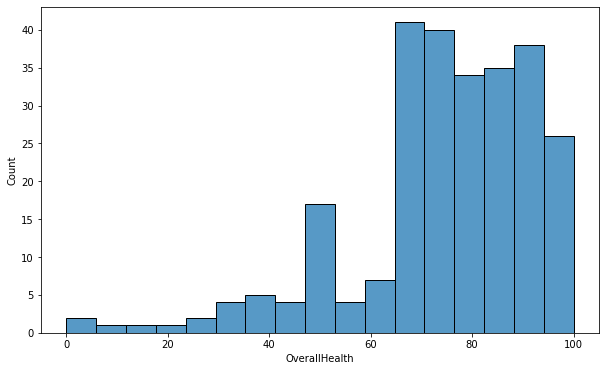

In [327]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='OverallHealth')

In [5]:
health_lsd = data[data['Substance_1']==1]['OverallHealth'] 
health_psilocybin = data[data['Substance_2']==1]['OverallHealth']

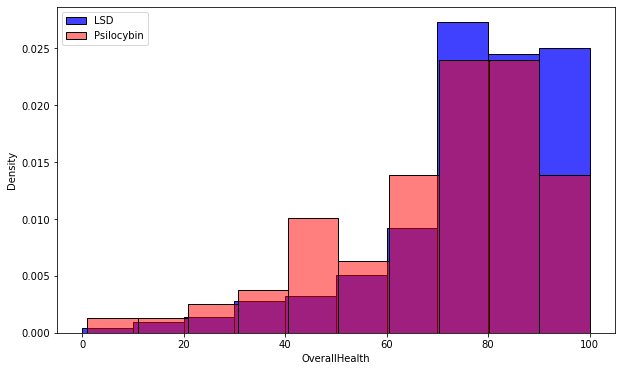

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x=health_lsd,stat="density", color='blue', bins=10)
sns.histplot(data=data,x=health_psilocybin, stat="density", color='red', bins=10, alpha=0.5)
plt.legend(['LSD', 'Psilocybin'], loc='upper left')

**Indicate which of the following substances you have used for recreational purposes (e.g. for fun, with friends, for experimenting)**

In [7]:
data['DrugRecreational_1']

,ResponseId,StartDate,EndDate,RecordedDate,Angry,Distressed,Afraid,Frustrated,Nervous,Alarmed,Tense,Annoyed,Astonished,Excited,Alert,Delighted,Amused,Glad,Happy,Pleased,Sad,Miserable,Depressed,Droopy,Gloomy,Fatigued,Bored,Tired,Serene,Content,Calm,At ease,Satisfied,Relaxed,Sleepy,Quiet,Current,Reddit,Country,Age,Gender,Orientation,Ethnicity,Ethnicity_11_TEXT,Religion,Religion_12_TEXT,Religiosity,Spirituality,Education,SES,AgeMD,Substance_1,Substance_2,Substance_8,Dose_1,Dose_4,Dose_2,Dose_3,Dose_7,Dose_8,Spacing,DoseNumber,Money,Money_1_TEXT,Money_2_TEXT,Money_3_TEXT,Money_5_TEXT,Money_6_TEXT,Friends,Recommend,Pro_1,Pro_1_TEXT,Pro_2,Pro_2_TEXT,Pro_3,Pro_3_TEXT,Con_1,Con_1_TEXT,Con_2,Con_2_TEXT,Con_3,Con_3_TEXT,ImpSleep,ImpEating,ImpExercise,ImpMeditative,ImpMood,ImpAnxiety,RedAlcohol,RedTobacco,RedCaffeine,RedCannabis,RedOther_illicit,RedPsychiatric,OverallHealth,DrugRecreational_1,DrugRecreational_2,DrugRecreational_3,DrugRecreational_4,DrugRecreational_5,DrugRecreational_6,DrugRecreational_7,DrugRecreational_8,DrugRecreational_9,DrugRecreational_10,DrugRecreational_11,DrugRecreational_12,DrugRecreational_13,DrugRecreationalMD,Diagnoses_2,Diagnoses_3,Diagnoses_4,Diagnoses_5,Diagnoses_18,Diagnoses_14,Diagnoses_7,Diagnoses_8,Diagnoses_15,Diagnoses_16,Diagnoses_10,DrugRXCurrent,DrugRXCurrent_1_TEXT,DrugRXMD,DrugRXMD_1_TEXT,BFI.2_63,BFI.2_64,BFI.2_65,BFI.2_66,BFI.2_67,BFI.2_68,BFI.2_69,BFI.2_70,BFI.2_71,BFI.2_72,BFI.2_73,BFI.2_74,BFI.2_75,BFI.2_76,BFI.2_77,BFI.2_78,BFI.2_79,BFI.2_80,BFI.2_81,BFI.2_82,BFI.2_83,BFI.2_84,BFI.2_85,BFI.2_86,BWSS_28,BWSS_29,BWSS_30,BWSS_31,BWSS_32,BWSS_33,BWSS_34,BWSS_35,BWSS_36,BWSS_37,BWSS_38,BWSS_39,BWSS_40,BWSS_41,BWSS_42,BWSS_43,BWSS_44,BWSS_45,BWSS_46,BWSS_47,BWSS_48,DAS.A.17_87,DAS.A.17_88,DAS.A.17_89,DAS.A.17_90,DAS.A.17_91,DAS.A.17_92,DAS.A.17_93,DAS.A.17_94,DAS.A.17_95,DAS.A.17_96,DAS.A.17_97,DAS.A.17_98,DAS.A.17_99,DAS.A.17_100,DAS.A.17_101,DAS.A.17_102,DAS.A.17_103,DebreifWithdraw,Substance_8_TEXT...Topics,Ethnicity_11_TEXT...Topics,Religion_12_TEXT...Topics,Dose_1_TEXT...Topics,Dose_2_TEXT...Topics,Dose_4_TEXT...Topics,Occupation...Topics,DrugRXCurrent_1_TEXT...Topics,Reddit_5_TEXT...Topics,DrugRXMD_1_TEXT...Topics,DrugRecreationalMD_1_TEXT...Topics,Con_1_TEXT...Topics,Con_2_TEXT...Topics,Con_3_TEXT...Topics,MD,LogDoseNumber,TB,TBt,Con_1_TEXT...TopicsXT,Pro,Con,Diagnosis,FD,Polydrug,Mood.Valence,Mood.Intensity,NegEmo,NegEmo_Anx,NegEmo_Dep,NegEmo_EVo,OpenMind,OpenMind_Aes,OpenMind_Int,OpenMind_CrI,BWSS,DAS,DAS_Pft,DAS_Dep,Con_1_Code,Con_2_Code,Con_3_Code,ProIndex,ProCode,ResponseId.1,Rating.P,ProRating,ResponseId.2,ConIndex,ConCode,Rating.C,ConRating,ProConcept,ProCategory,ConConcept,ConCategory,ProCode1,ProCategory1,ProRating1,ConCode1,ConCategory1,ConRating1,ProCode2,ProCategory2,ProRating2,ConCode2,ConCategory2,ConRating2,ProCode3,ProCategory3,ProRating3,ConCode3,ConCategory3,ConRating3
0,R_0HSeYpblz5LCLpD,19/09/2017 18:27,19/09/2017 18:51,19/09/2017 18:51,0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,5,187,21,-1.0,-1.0,1,-99,1,-99,2,20,6.0,1.0,20,1,-99,-99,-99,1,-99,-99,-99,-99,3,25.0,1,5,-99,-99,-99,-99,0,2,85,Self-Reflection,90.0,Changing internal beliefs,55.0,Habit-Training,25.0,Worse night of sleep,4.0,Illegal,20.0,"I'm on a ""drug""",0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,83.0,2.0,4.0,2.0,1.0,1.0,4.0,4.0,3.0,4.0,4.0,1.0,1.0,4.0,NaN,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,4.0,-99,NaN,NaN,50.0,29.0,43.0,100.0,14.0,91.0,100.0,72.0,61.0,100.0,28.0,73.0,90.0,35.0,76.0,97.0,47.0,91.0,80.0,30.0,72.0,96.0,0.0,93.0,94.0,41.0,66.0,44.0,90.0,77.0,60.0,71.0,84.0,26.0,38.0,81.0,33.0,43.0,61.0,37.0,100.0,17.0,8.0,19.0,95.0,18.0,85.0,58.0,89.0,88.0,57.0,59.0,57.0,59.0,85.0,82.0,35.0,80.0,50.0,72.0,56.0,82.0,1.0,NaN,NaN,NaN,NaN,NaN,12.0,Student,NaN,/r/RationalPsychonaut,NaN,NaN,Sleep Disturbances,Illegality,Stigma,1,3.218876,1,1,NaN,76.666667,16.333333,0.0,1.0,21.0,-9,3,55.083333,80.00,63.00,22.25,75.583333,41.50,98.25,87.00,56.428571,83.72,55.2

In [40]:
data.columns.get_indexer(['DrugRecreational_1'])[0]
#data['DrugRecreational_1'].column

95

In [42]:
data.iloc[:,data.columns.get_indexer(['DrugRecreational_1'])[0]]

0      2.0
1      1.0
2      1.0
3      4.0
4      1.0
      ... 
273    1.0
274    2.0
275    2.0
276    2.0
277    1.0
Name: DrugRecreational_1, Length: 278, dtype: float64

In [50]:
data.iloc[:,95].name == 'DrugRecreational_1'

True

In [124]:
dict = {1.0: 'Past Month', 2.0: 'Past Year', 3.0: 'Ever Used',
        4.0: 'Never Used', 5.0: 'Prefer not to answer'}
counter = 0
for i in range(1,14):
    index = data.columns.get_indexer(['DrugRecreational_1'])[0]
    data.replace({(data.iloc[:, index + counter]).name: dict, }, inplace=True)
    counter += 1

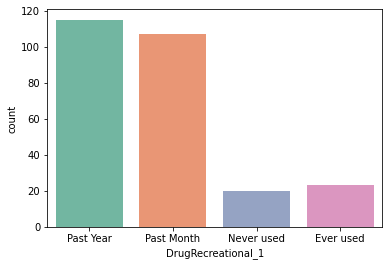

In [125]:
sns.countplot(data=data, x=data['DrugRecreational_1'], palette='Set2')

In [80]:
index = data.columns.get_indexer(['DrugRecreational_1'])[0]
data.iloc[:,index].name

'DrugRecreational_1'

In [102]:
2 % 2

0

In [145]:
dict = {'DrugRecreational_1': 'Classic Hallucinogens (full dose)',
        'DrugRecreational_2': 'Research chemical Hallucinogens (full dose)',
        'DrugRecreational_3': 'MDxx',
        'DrugRecreational_4': 'Cannabis',
        'DrugRecreational_5': 'Alcohol',
        'DrugRecreational_6': 'Stimulants',
        'DrugRecreational_7': 'Opiates',
        'DrugRecreational_8': 'Dissociatives',
        'DrugRecreational_9': 'Sedatives',
        'DrugRecreational_10': 'Inhalants',
        'DrugRecreational_11': 'Caffeine',
        'DrugRecreational_12': 'Nootropics',
        'DrugRecreational_13': 'Prescription drugs',
       }

type(dict.get('DrugRecreational_1'))

str

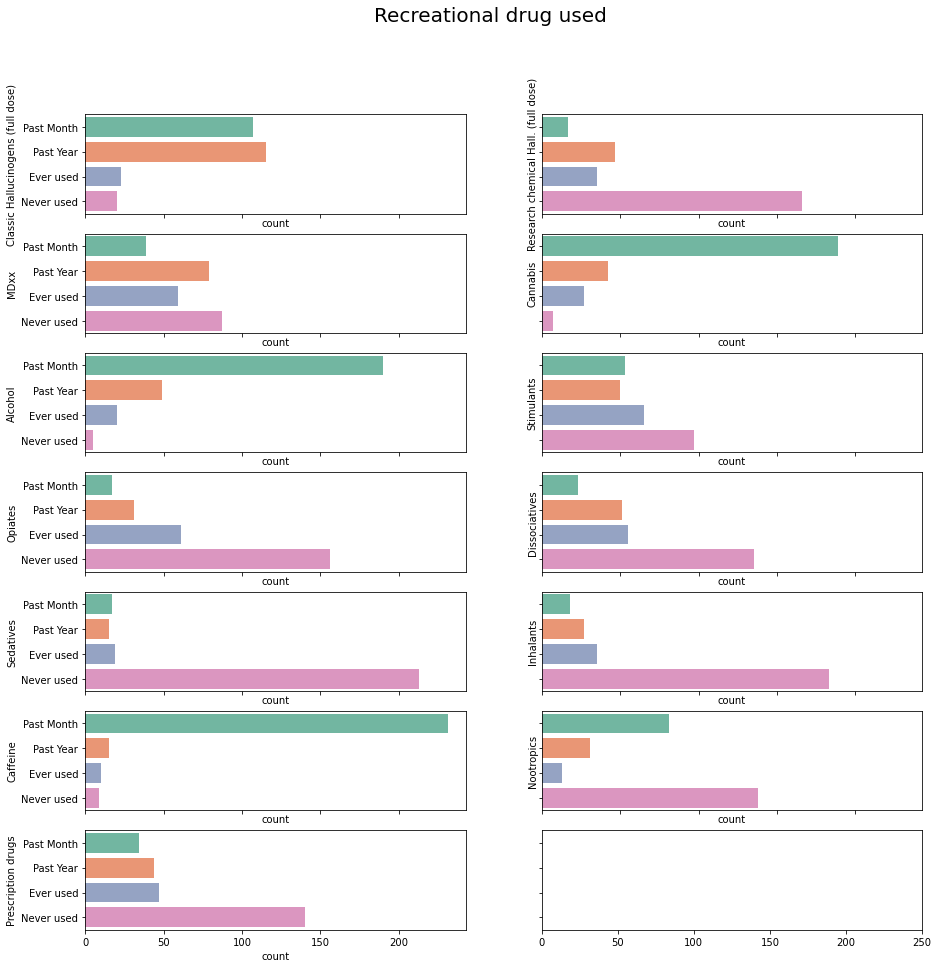

In [150]:
fig, axs = plt.subplots(7,2, sharey=True, sharex=True, figsize=(15,15))
dict = {'DrugRecreational_1': 'Classic Hallucinogens (full dose)',
        'DrugRecreational_2': 'Research chemical Hall. (full dose)',
        'DrugRecreational_3': 'MDxx',
        'DrugRecreational_4': 'Cannabis',
        'DrugRecreational_5': 'Alcohol',
        'DrugRecreational_6': 'Stimulants',
        'DrugRecreational_7': 'Opiates',
        'DrugRecreational_8': 'Dissociatives',
        'DrugRecreational_9': 'Sedatives',
        'DrugRecreational_10': 'Inhalants',
        'DrugRecreational_11': 'Caffeine',
        'DrugRecreational_12': 'Nootropics',
        'DrugRecreational_13': 'Prescription drugs',
       }

order = ['Past Month', 'Past Year', 'Ever used', 'Never used']

counter = 0
row = 0
for i in range(1,14):
    if counter % 2 != 0:
        column = 1
    else:
        column = 0
    index = data.columns.get_indexer(['DrugRecreational_1'])[0]
    name = data.iloc[:, index+counter].name
    sns.countplot(data=data, y=data[name], order=order, ax=axs[row, column], palette='Set2')
    axs[row, column].set(ylabel=dict.get(name))
    plt.xticks([0, 50, 100, 150, 200, 250])
    counter += 1
    if column == 1:
        row += 1
    
plt.suptitle('Recreational drug used',fontsize=20);

**Score "Polydrug User Experiences Index"**

A "Polydrug user experience index" will be computed as the sum of items indicating recreational substance use:

 - Each class of drug used in past month: +4 points
 
 - Each class of drug used in past year: +2 points
 
 - Each class of drug used ever: +1 point.
 
 - Each class of drug never used: +0 points
 
 - Each class of drug "Prefer not to answer": +0 points
 
 - As there are 13 classes of substance listed in the survey the scores may range from 0-52
 

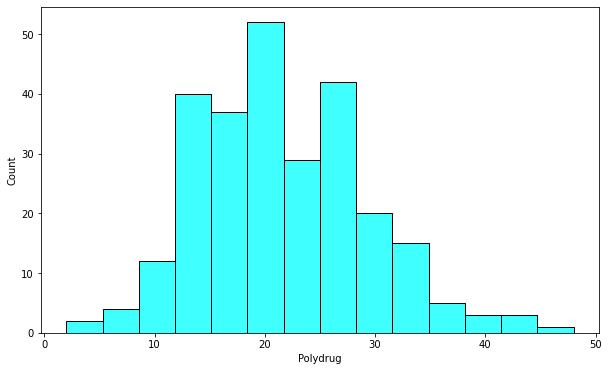

In [301]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['Polydrug'], color='aqua')

**Were you taking any recreational drugs in addition to your microdose while you were microdosing?**

In [194]:
print(f"Yes: {sum(data['DrugRecreationalMD']==1)}")
print(f"No: {sum(data['DrugRecreationalMD']==4)}")

Yes: 54
No: 67


In [196]:
data['DrugRecreationalMD_1_TEXT...Topics'].value_counts()

Cannabis              39
Cannabis,Alcohol       6
Alcohol                4
Other                  3
Other Psychedelics     2
Name: DrugRecreationalMD_1_TEXT...Topics, dtype: int64

**Have you ever been diagnosed by a doctor or health care professional with any of the following diagnoses?**

In [202]:
print(f"Attention-Deficit/Hyperactivity Disorder (ADHD): {sum(data['Diagnoses_2']==1)}")
print(f"Autism Spectrum Disorder: {sum(data['Diagnoses_3']==1)}")
print(f"Obsessive Compulsive Disorder: {sum(data['Diagnoses_4']==1)}")
print(f"Posttraumatic Stress Disorder: {sum(data['Diagnoses_5']==1)}")
print(f"Substance Use Disorder: {sum(data['Diagnoses_18']==1)}")
print(f"Dissociative Identity Disorder: {sum(data['Diagnoses_14']==1)}")
print(f"Anxiety: {sum(data['Diagnoses_7']==1)}")
print(f"Mood Disorder: {sum(data['Diagnoses_8']==1)}")
print(f"Eating Disorder: {sum(data['Diagnoses_15']==1)}")
print(f"Schizophrenia Spectrum Disorder: {sum(data['Diagnoses_16']==1)}")
print(f"None of the above: {sum(data['Diagnoses_10']==1)}")

Attention-Deficit/Hyperactivity Disorder (ADHD): 54
Autism Spectrum Disorder: 9
Obsessive Compulsive Disorder: 7
Posttraumatic Stress Disorder: 17
Substance Use Disorder: 3
Dissociative Identity Disorder: 5
Anxiety: 73
Mood Disorder: 72
Eating Disorder: 2
Schizophrenia Spectrum Disorder: 4
None of the above: 137


**Are you currently taking any prescription drugs as prescribed by a doctor or health care professional?**

In [208]:
dict = {1: 'Yes', 4: 'No', 5: 'Prefer Not To Answer'}
data.replace({'DrugRXCurrent': dict}, inplace=True)
data['DrugRXCurrent'].value_counts()

No                      199
Yes                      64
Prefer Not To Answer      2
Name: DrugRXCurrent, dtype: int64

In [232]:
data['DrugRXCurrent_1_TEXT...Topics'].value_counts(ascending=False)

Non-psychotropic                                                                              18
Dopamine and norepinephrine reuptake inhibitor and releaser                                   11
Benzodiazepine receptor agonist                                                                4
SSRI                                                                                           3
Unknown                                                                                        3
Non-psychotropic,voltage-gated calcium channel blocker                                         2
Triptan                                                                                        2
SSRI,5-HT2 receptor antagonist and 5-HT1A receptor agonist                                     2
Bupropion                                                                                      2
Norepinephrine reuptake inhibitor                                                              2
Mood stabilizer - voltage-gate

**Were you taking any prescription drugs while you were microdosing?**

In [226]:
data.replace({'DrugRXMD': dict}, inplace=True)
data['DrugRXMD'].value_counts()

No                      109
Yes                      11
Prefer Not To Answer      1
Name: DrugRXMD, dtype: int64

In [230]:
data['DrugRXMD_1_TEXT...Topics'].value_counts()

Non-psychotropic                                                         6
Bupropion,Dopamine and norepinephrine reuptake inhibitor and releaser    1
Dopamine and norepinephrine reuptake inhibitor and releaser              1
Bupropion                                                                1
Non-psychotropic,SSRI                                                    1
SSRI                                                                     1
Name: DrugRXMD_1_TEXT...Topics, dtype: int64

## BFI-2

Soto, C. J., & John, O. P. (2017). The next Big Five Inventory (BFI-2): **Developing and assessing a hierarchical model with 15 facets to enhance bandwidth, fidelity, and predictive power**. Journal of Personality and Social Psychology, 113,117-143.

**Negative Emotionality** 

- Anxiety: 

- Depression: 

- Emotional Volatility: 

Text(0.5, 1.0, 'Negative Emotionality')

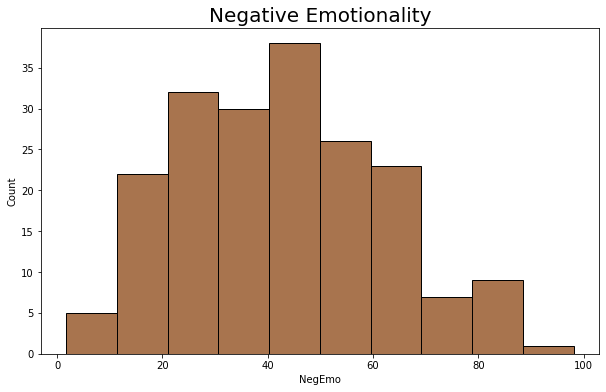

In [280]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['NegEmo'], color='saddlebrown', bins=10)
plt.title('Negative Emotionality',fontsize=20)

Text(0.5, 0.98, 'Negative Emotionality')

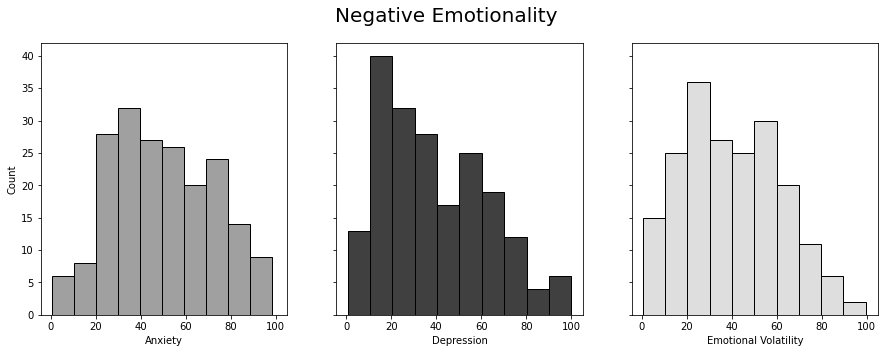

In [281]:
fig, axs = plt.subplots(1,3,sharey=True, sharex=True, figsize=(15,5))
sns.histplot(data=data, x=data['NegEmo_Anx'], ax=axs[0], color='grey', bins=10,)
axs[0].set(xlabel="Anxiety", ylabel = "Count")

sns.histplot(data=data, x=data['NegEmo_Dep'], ax=axs[1], color='black', bins=10)
axs[1].set(xlabel="Depression")
plt.suptitle('Depression',fontsize=20)

sns.histplot(data=data, x=data['NegEmo_EVo'], ax=axs[2], color='lightgrey', bins=10)
axs[2].set(xlabel="Emotional Volatility")

plt.suptitle('Negative Emotionality',fontsize=20)

In [303]:
negative_emotionality = data[['NegEmo', 'NegEmo_Anx', 'NegEmo_Dep', 'NegEmo_EVo']]
negative_emotionality.corr()

,NegEmo,NegEmo_Anx,NegEmo_Dep,NegEmo_EVo
NegEmo,1.000000,0.880506,0.875019,0.843724
NegEmo_Anx,0.880506,1.000000,0.667282,0.618616
NegEmo_Dep,0.875019,0.667282,1.000000,0.598315
NegEmo_EVo,0.843724,0.618616,0.598315,1.000000


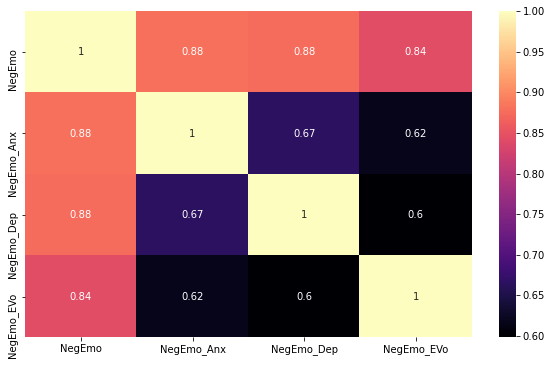

In [325]:
plt.figure(figsize=(10,6))
sns.heatmap(negative_emotionality.corr(), cmap="magma", annot=True)

**Open-Mindedness**

- Intellectual Curiosity:  
- Aesthetic Sensitivity: 
- Creative Imagination: 

Text(0.5, 1.0, 'Open-Mindedness')

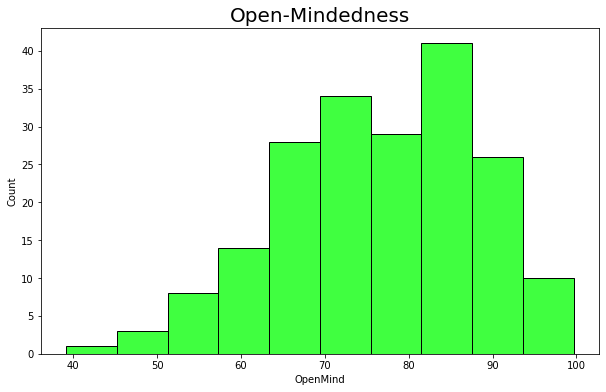

In [279]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['OpenMind'], color='lime', bins=10)
plt.title('Open-Mindedness',fontsize=20)

Text(0.5, 0.98, 'Open-Mindedness')

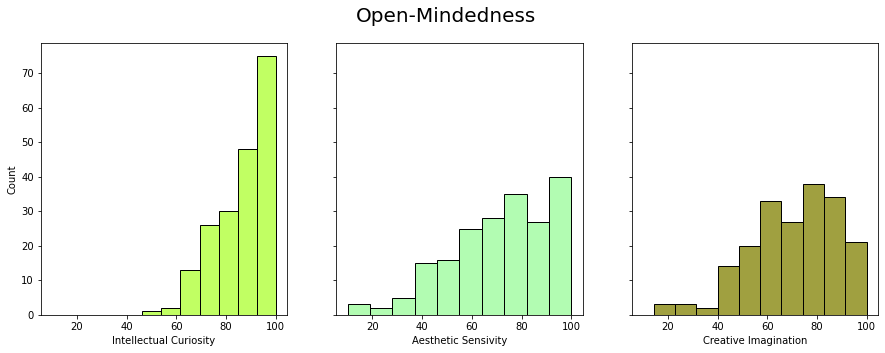

In [290]:
fig, axs = plt.subplots(1,3,sharey=True, sharex=True, figsize=(15,5))
sns.histplot(data=data, x=data['OpenMind_Int'], ax=axs[0], color='greenyellow', bins=7)
axs[0].set(xlabel="Intellectual Curiosity", ylabel = "Count")

sns.histplot(data=data, x=data['OpenMind_Aes'], ax=axs[1], color='palegreen', bins=10)
axs[1].set(xlabel="Aesthetic Sensivity")

sns.histplot(data=data, x=data['OpenMind_CrI'], ax=axs[2], color='olive', bins=10)
axs[2].set(xlabel="Creative Imagination")

plt.suptitle('Open-Mindedness',fontsize=20)

In [322]:
open_mindedness = data[['OpenMind', 'OpenMind_Int', 'OpenMind_Aes', 'OpenMind_CrI']]
open_mindedness.corr()

,OpenMind,OpenMind_Int,OpenMind_Aes,OpenMind_CrI
OpenMind,1.000000,0.605804,0.784650,0.760535
OpenMind_Int,0.605804,1.000000,0.251689,0.340504
OpenMind_Aes,0.784650,0.251689,1.000000,0.295658
OpenMind_CrI,0.760535,0.340504,0.295658,1.000000


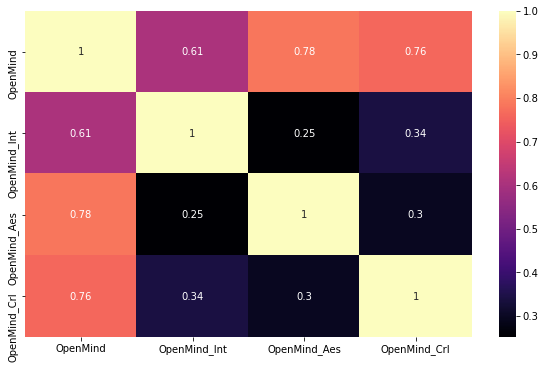

In [324]:
plt.figure(figsize=(10,6))
sns.heatmap(open_mindedness.corr(), cmap="magma", annot=True)

## Brief Wisdom Screening Scale

A “Brief Wisdom Screening Scale” is introduced that contains those 20 items from the three self-report scales that were most highly correlated with the common factor across the scales.

[How to measure wisdom: content, reliability, and validity of five measures](https://www.frontiersin.org/articles/10.3389/fpsyg.2013.00405/full#:~:text=The%20brief%20wisdom%20screening%20scale,was%20used%20as%20BWSS%20score.)

Text(0.5, 1.0, 'Brief Wisdom Screening Scale')

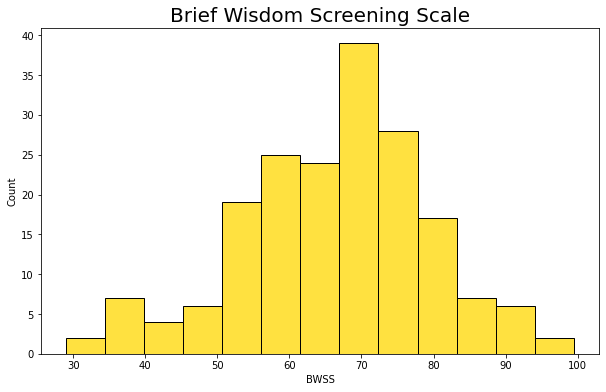

In [293]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['BWSS'], color='gold')
plt.title('Brief Wisdom Screening Scale',fontsize=20)

In [326]:
bwss = data['BWSS']

## DAS-A-17

The DAS-A-17 is a short-version of the Dysfunctional Attitude Scale, a 40-item self-report scale designed to measure the presence and intensity of dysfunctional beliefs (de Graaf et al. 2009 ). Participants rate statements of beliefs.

[Measuring Dysfunctional Attitudes in the General Population: The Dysfunctional Attitude Scale (form A) Revised](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2712063/)

Text(0.5, 1.0, 'Dysfunctional Attitude Scale')

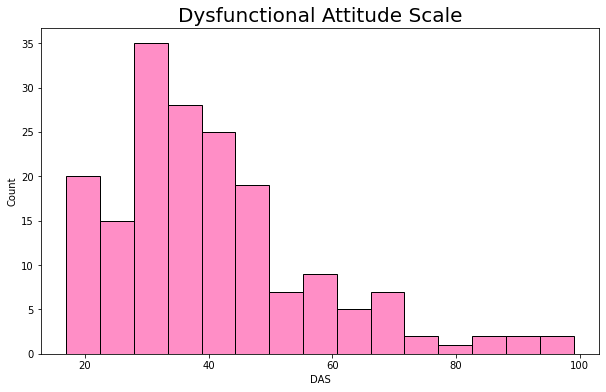

In [294]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['DAS'], color='hotpink')
plt.title('Dysfunctional Attitude Scale',fontsize=20)

Text(0.5, 0.98, 'Dysfunctional Attitude Scale')

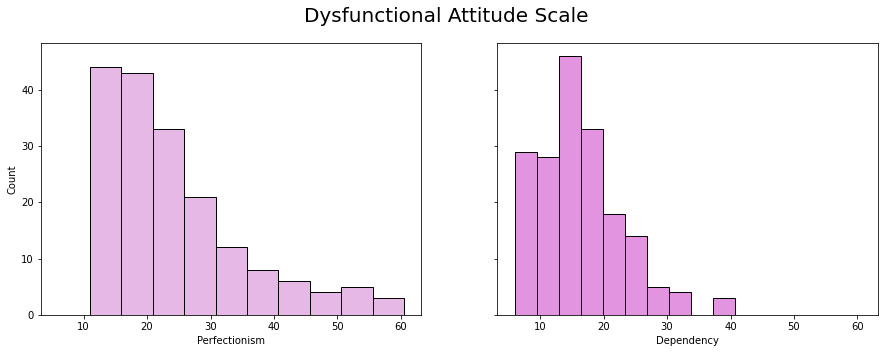

In [297]:
fig, axs = plt.subplots(1,2,sharey=True, sharex=True, figsize=(15,5))

sns.histplot(data=data, x=data['DAS_Pft'], ax=axs[0], color='plum', bins=10)
axs[0].set(xlabel="Perfectionism")

sns.histplot(data=data, x=data['DAS_Dep'], ax=axs[1], color='orchid', bins=10)
axs[1].set(xlabel="Dependency", ylabel = "Count")

plt.suptitle('Dysfunctional Attitude Scale',fontsize=20)

In [327]:
das = data[['DAS', 'DAS_Pft', 'DAS_Dep']]
das.corr()

,DAS,DAS_Pft,DAS_Dep
DAS,1.000000,0.951973,0.869463
DAS_Pft,0.951973,1.000000,0.676453
DAS_Dep,0.869463,0.676453,1.000000


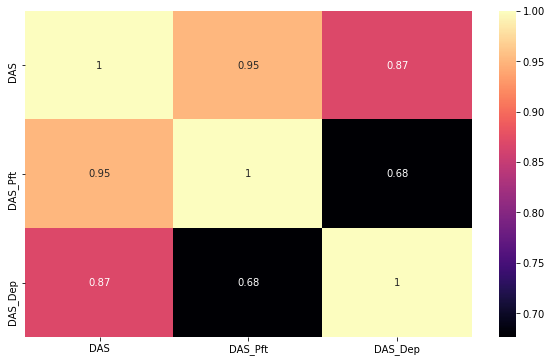

In [329]:
plt.figure(figsize=(10,6))
sns.heatmap(das.corr(), cmap="magma", annot=True)

In [330]:
characteristics = data[['NegEmo','OpenMind', 'BWSS', 'DAS']]
characteristics.corr()

,NegEmo,OpenMind,BWSS,DAS
NegEmo,1.000000,-0.208270,-0.573812,0.486012
OpenMind,-0.208270,1.000000,0.361179,-0.177853
BWSS,-0.573812,0.361179,1.000000,-0.488763
DAS,0.486012,-0.177853,-0.488763,1.000000


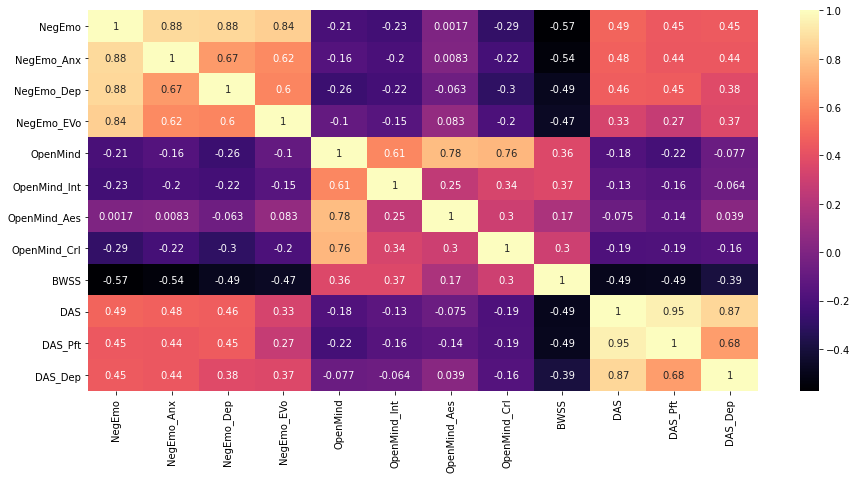

In [343]:
all_characteristics = data[['NegEmo', 'NegEmo_Anx', 'NegEmo_Dep', 'NegEmo_EVo',
                            'OpenMind', 'OpenMind_Int', 'OpenMind_Aes', 'OpenMind_CrI', 
                            'BWSS', 
                            'DAS', 'DAS_Pft', 'DAS_Dep',
                            ]]
plt.figure(figsize=(15,7))
sns.heatmap(all_characteristics.corr(), cmap='magma', annot=True)

## Benefits and Drawbacks